# Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from geopy.geocoders import Nominatim
from tqdm import tqdm

C:\Users\yukar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
rain = pd.read_csv('data/rain_data_aus.csv')

In [3]:
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')
wind_1.columns = wind_3.columns
wind_2.columns = wind_3.columns
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

# O Baseline
Baseline calculado a partir da regressão linear do dataframe 'Rain'.

## Tratamento

In [4]:
rain = rain.dropna()
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

In [5]:
X = rain[[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm','modelo_vigente', 'amountOfRain',
       'precipitation9am']]
y = rain['raintomorrow']
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model.score(X, y)

0.9997092929358183

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)

In [8]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.score(X_test, y_test)

0.9993539912573484

In [10]:
model.score(X_train, y_train)

0.9992893597777635

# Overfitting
Tratar o dataframe pois deu overfitting no modelo anterior.

In [11]:
rain.corr().style.background_gradient(cmap='coolwarm')

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
mintemp,1.000000,0.743674,0.110846,0.510004,0.070680,-0.177758,0.076333,-0.475451,-0.491435,0.115204,0.050917,0.905552,0.720796,0.051478,0.142911,0.088964,0.578773,0.068579,0.003508,-0.001382,0.135744
maxtemp,0.743674,1.000000,-0.069482,0.652247,0.461698,-0.496329,-0.448043,-0.355855,-0.454047,-0.262003,-0.253183,0.890743,0.984101,-0.220012,-0.015487,-0.144498,0.779778,-0.406402,0.003385,-0.001055,-0.212616
rainfall,0.110846,-0.069482,1.000000,-0.074049,-0.243738,0.258127,0.270421,-0.177673,-0.133452,0.215699,0.191743,0.014438,-0.073640,0.553481,0.302723,0.253773,-0.060093,0.247128,-0.007556,-0.003066,0.371184
evaporation,0.510004,0.652247,-0.074049,1.000000,0.366577,-0.554104,-0.414895,-0.304406,-0.330799,-0.192775,-0.196180,0.598609,0.631686,-0.213291,-0.042126,-0.127257,0.509947,-0.375537,0.007043,-0.000189,-0.183537
sunshine,0.070680,0.461698,-0.243738,0.366577,1.000000,-0.498855,-0.622767,0.035783,-0.027949,-0.678801,-0.704871,0.285678,0.483256,-0.327720,-0.298182,-0.449261,0.359295,-0.565134,-0.003376,0.004404,-0.643104
humidity9am,-0.177758,-0.496329,0.258127,-0.554104,-0.498855,1.000000,0.679847,0.122421,0.178441,0.432826,0.344565,-0.426737,-0.487789,0.371288,0.177473,0.265360,-0.388460,0.617538,-0.003913,-0.001670,0.392692
humidity3pm,0.076333,-0.448043,0.270421,-0.414895,-0.622767,0.679847,1.000000,-0.057837,0.028653,0.507677,0.507461,-0.148491,-0.498921,0.376480,0.309910,0.447742,-0.351533,0.907959,-0.003120,-0.003777,0.644851
pressure9am,-0.475451,-0.355855,-0.177673,-0.304406,0.035783,0.122421,-0.057837,1.000000,0.961926,-0.142788,-0.164998,-0.447688,-0.314549,-0.183468,-0.174923,-0.255934,-0.274905,-0.052670,-0.002484,0.003967,-0.371539
pressure3pm,-0.491435,-0.454047,-0.133452,-0.330799,-0.027949,0.178441,0.028653,0.961926,1.000000,-0.074193,-0.101631,-0.500713,-0.422233,-0.100839,-0.174031,-0.231428,-0.351972,0.025834,-0.002560,0.004046,-0.322904
cloud9am,0.115204,-0.262003,0.215699,-0.192775,-0.678801,0.432826,0.507677,-0.142788,-0.074193,1.000000,0.612633,-0.101916,-0.278856,0.297414,0.204768,0.319410,-0.203947,0.460164,-0.000451,-0.000973,0.473697


Vamos ter que tirar o Amount of Rain e o Modelo Vigente,pois está diretamente relacionado ao overfitting.

In [12]:
X = rain[[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm','precipitation9am']]
y = rain['raintomorrow']
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.score(X, y)

0.8372847960205433

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_train, y_train)

0.8360359196330512

In [15]:
model.score(X_test, y_test)

0.8377010702211504

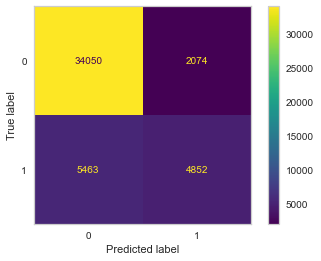

In [16]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

Taxa de acerto e a taxa de captura está quanto ?

In [17]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7020218401989404
Taxa de captura: 0.47009846510280917


## Aumentar a taxe de acertos

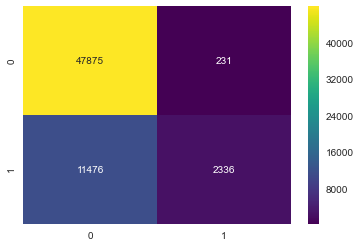

In [18]:
y_pred = model.predict_proba(X)[:, 1] > 0.8
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt="d", annot_kws={'verticalalignment':'top'})

Taxa de acerto e a taxa de captura ficou em quanto ?

In [19]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7020218401989404
Taxa de captura: 0.47009846510280917


## Diminuir a taca de acertos

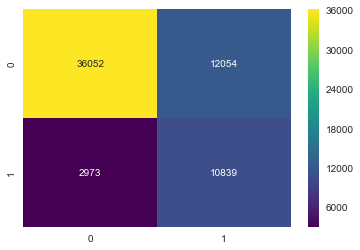

In [20]:
y_pred = model.predict_proba(X)[:, 1] > 0.2
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt="d")

Taxa de acerto e a taxa de captura ficou em quanto ?

In [21]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7020218401989404
Taxa de captura: 0.47009846510280917


Se quer aumentar a taxa de acerto, a taxa de captura diminui.

Se quiser aumentar a taxa de captura, a taxa de acerto diminui.



# Mesclar dataframes
Tentativa de mesclar os dataframes para melhorar o modelo

In [22]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates().drop(columns=['date', 'location']).fillna(0)

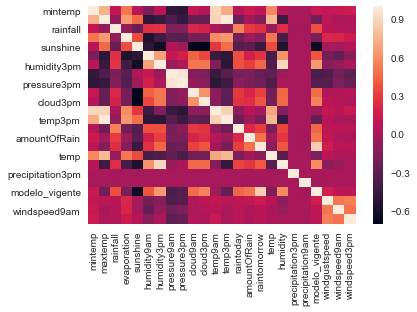

In [23]:
sns.heatmap(df.corr())

## Regressão Logística com a velocidade dos ventos

In [24]:
X = df[['windgustspeed', 'windspeed9am','windspeed3pm']]
y = df['raintomorrow']
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.score(X, y)

0.7777059982557576

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_train, y_train)

0.7746624458944377

In [27]:
model.score(X_test, y_test)

0.7787204720170546

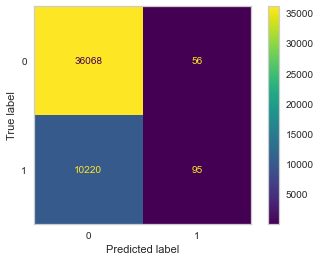

In [28]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

Taxa de acerto e a taxa de captura ficou em quanto ?

In [29]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.6224489795918368
Taxa de captura: 0.008832898928468


## Dummies

In [30]:
dfd = pd.get_dummies(df)

In [31]:
X = dfd[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = dfd['raintomorrow']
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
model.score(X, y)

0.8517070964824445

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_train, y_train)

0.8494088765424123

In [34]:
model.score(X_test, y_test)

0.8524731368031181

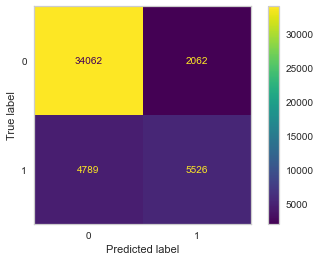

In [35]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

In [36]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7288453934361407
Taxa de captura: 0.5338111786852012


## Cotovelos

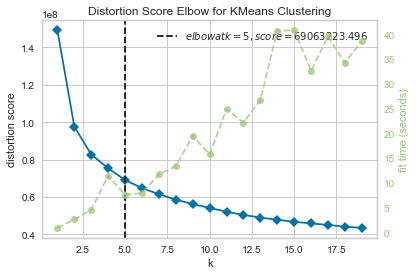

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dfd)
visualizer.show()

In [38]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
dfd['labels'] = model.labels_

In [40]:
modelo = LogisticRegression(max_iter=10000)

## Mascaras

In [41]:
mask = dfd['labels'] == 0
X = dfd[mask].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente', 'labels']) 
y = dfd[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
modelo.score(X,y)

0.8498700504510014

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8458715596330275

In [44]:
modelo.score(X_test, y_test)

0.8512026090501427

**Fazer função para colocar labels nos 5**

# Não dropar o NaN do 'Rain'

## Ler o dataframe e tratar

In [45]:
rain = pd.read_csv('data/rain_data_aus.csv')
rain.fillna(0)
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

## Mesclar dataframes

In [46]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates().drop(columns=['date', 'location']).fillna(0)

## Dummies

In [47]:
df = pd.get_dummies(df)

In [48]:
df = df.sample(10000)

In [49]:
df.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW
152833,16.1,21.8,6.2,1.2,6.5,77.0,56.0,1011.0,1013.2,7.0,...,0,0,0,0,0,0,1,0,0,0
32571,11.9,25.4,0.4,0.0,0.0,92.0,45.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
128353,10.3,22.5,2.0,6.0,10.1,78.0,46.0,1014.6,1017.2,5.0,...,0,0,1,0,0,0,0,0,0,0
80275,8.7,26.4,0.0,0.0,0.0,99.0,56.0,1019.1,1012.6,8.0,...,0,0,0,0,0,0,0,0,0,0
41077,12.0,22.8,0.0,5.0,6.9,36.0,34.0,1007.2,999.9,7.0,...,0,1,0,0,0,0,0,0,0,0


## Cotovelos

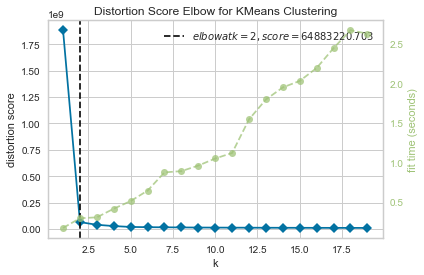

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df.drop(columns=['raintomorrow']))
visualizer.show()

In [51]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'windgustdir_0',
       'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N',
       'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0', 'winddir3pm_E',
       'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE',
       'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S',
       'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW',
       'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
model = KMeans(n_clusters=2, n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
df['labels'] = model.labels_

## Labels

### Labels == 0

In [53]:
modelo = LogisticRegression(max_iter=10000)

In [54]:
mask = df['labels'] == 0
X = df[mask].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
modelo.score(X,y)

0.8436108637577916

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.838379341050757

In [57]:
modelo.score(X_test, y_test)

0.8453547046601365

In [58]:
pandas = pd.DataFrame(zip(modelo.coef_ [0], X.columns), columns=['Coef', 'Var']).sort_values(by='Coef')
pandas

,Coef,Var
26,-0.497692,windgustdir_NE
66,-0.457559,winddir3pm_SSE
36,-0.448338,windgustdir_WNW
58,-0.391854,winddir3pm_ESE
60,-0.383647,winddir3pm_NE
...,...,...
62,0.471340,winddir3pm_NNW
63,0.628145,winddir3pm_NW
13,0.647498,raintoday
55,0.779422,winddir3pm_0


In [59]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7317246273953159
Taxa de captura: 0.5009718172983479


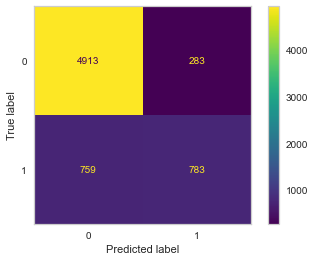

In [60]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


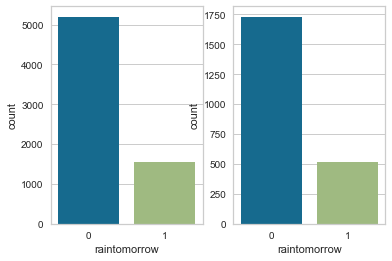

In [61]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

### Labels == 1

In [62]:
mask1 = df['labels'] == 1
X = df[mask1].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df[mask1]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
modelo.score(X,y)

0.8346456692913385

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8188976377952756

In [65]:
modelo.score(X_test, y_test)

0.8398950131233596

In [66]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7153846153846154
Taxa de captura: 0.41517857142857145


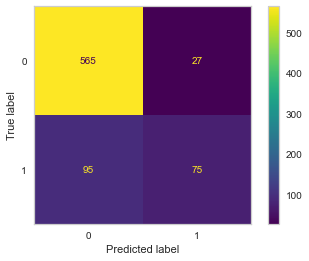

In [67]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


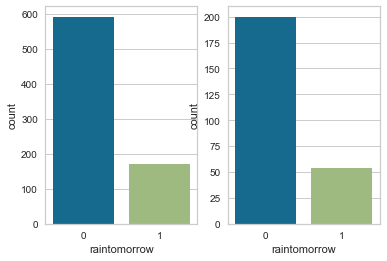

In [68]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

**O dataset está desbalanceado. Por exemplo: 1/3 do valor é que vai chover (1), então tem que ser equilibrados.**

# Balancear o DataFrame

In [69]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'windgustdir_0',
       'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N',
       'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0', 'winddir3pm_E',
       'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE',
       'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S',
       'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW',
       'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = df['raintomorrow']

In [70]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [71]:
y_resampled.value_counts()

1    2282
0    2282
Name: raintomorrow, dtype: int64

## Regressão Logística

In [72]:
model = LogisticRegression(max_iter=10000)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
model.score(X_resampled, y_resampled)

0.773225241016652

In [74]:
precision_score(y_resampled, model.predict(X_resampled))

0.7797218483624944

## Cotovelos

In [75]:
X_resampled['raintomorrow'] = y_resampled
sample = X_resampled

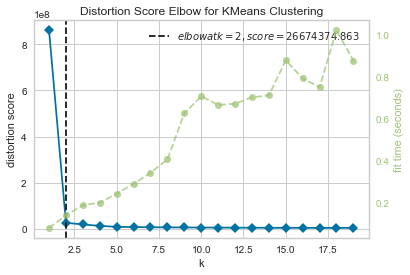

In [76]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(sample)
visualizer.show()

In [77]:
X = sample[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = sample['raintomorrow']

In [78]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
sample['labels'] = model.labels_

## Labels

### Labels == 0

In [80]:
mask = sample['labels'] == 0
X = sample[mask].drop(columns=['raintomorrow'])
y = sample[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
modelo.score(X,y)

0.7815167032431114

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7765853658536586

In [83]:
modelo.score(X_test, y_test)

0.7831599479843954

In [84]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7876237623762377
Taxa de captura: 0.7730806608357629


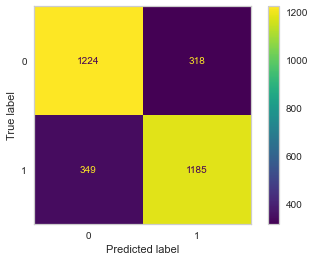

In [85]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


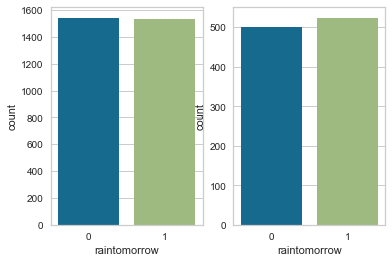

In [86]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

### Labels == 1

In [87]:
mask1 = sample['labels'] == 1
X = sample[mask1].drop(columns=['raintomorrow'])
y = sample[mask1]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
modelo.score(X,y)

0.7818574514038877

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.782608695652174

In [90]:
modelo.score(X_test, y_test)

0.7816091954022989

In [91]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.8029556650246306
Taxa de captura: 0.7276785714285714


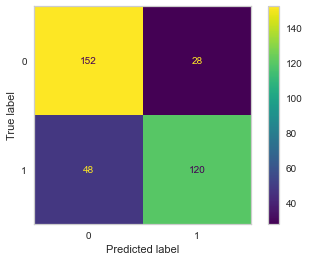

In [92]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


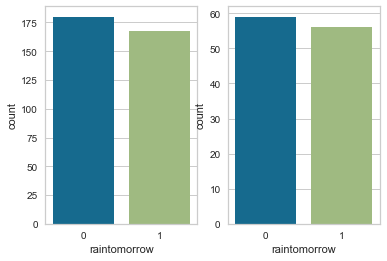

In [93]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

## KNN

In [94]:
X = sample[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = sample['raintomorrow']

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


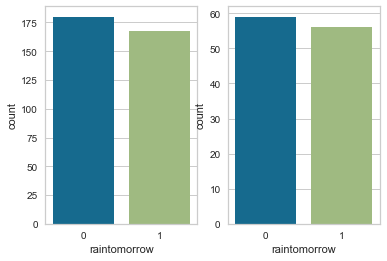

In [95]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

In [96]:
neigh = KNeighborsClassifier(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [97]:
neigh.score(X_train, y_train)

0.8510078878177038

In [98]:
neigh.score(X_test, y_test)

0.6897458369851008

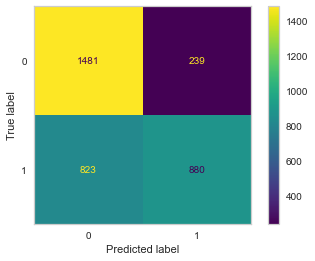

In [99]:
plot_confusion_matrix(neigh, X_test, y_test, values_format='.0f')
plt.grid(False)

In [100]:
print('Taxa de acerto:', + precision_score(y, neigh.predict(X)))
print('Taxa de captura:', + recall_score(y, neigh.predict(X)))

Taxa de acerto: 0.8435863874345549
Taxa de captura: 0.5648553900087643


## ROC

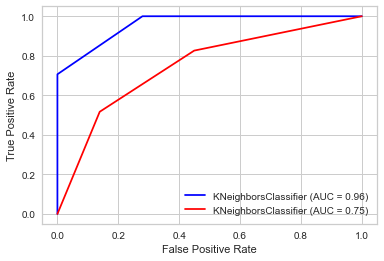

In [101]:
fig, ax = plt.subplots()
plot_roc_curve(neigh, X_train, y_train, color='blue', ax=ax)
plot_roc_curve(neigh, X_test, y_test, color='red', ax= ax)

# Usar todos os métodos até agora

## Dataframe

In [108]:
rain = pd.read_csv('data/rain_data_aus.csv')

In [109]:
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

In [110]:
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')
wind_1.columns = wind_3.columns
wind_2.columns = wind_3.columns
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

In [111]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates().drop(columns=['date', 'location'])

## Dummies

In [112]:
df = pd.get_dummies(df)

In [113]:
df.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain',
       'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE',
       'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE',
       'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW',
       'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE',
       'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW',
       'winddir9am_W

In [114]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain',
       'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE',
       'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE',
       'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW',
       'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE',
       'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW',
       'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE',
       'winddir3pm_N', 'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW',
       'winddir3pm_NW', 'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE',
       'winddir3pm_SSW', 'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW',
       'winddir3pm_WSW']]
y = df['raintomorrow']

## Balancear DataFrame

In [115]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [116]:
df = X_resampled
df['raintomorrow'] = y_resampled

## KNNImputer

In [118]:
imputer = KNNImputer(n_neighbors=2)

In [119]:
df = pd.DataFrame(imputer.fit_transform(X_resampled), columns=X_resampled.columns)

In [120]:
df['raintomorrow'] = y_resampled

In [121]:
df.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'windgustdir_E',
       'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE',
       'windgustdir_NNE', 'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S',
       'windgustdir_SE', 'windgustdir_SSE', 'windgustdir_SSW',
       'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW', 'windgustdir_WSW',
       'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N',
       'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW',
       'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW',
       'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW',
       'winddir3pm

In [122]:
X = df.drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df['raintomorrow']

In [123]:
df.to_csv('weather_knn.csv')

## Standardizar

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()

In [126]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
dfs=pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [128]:
dfs['raintomorrow'] = df['raintomorrow']

In [129]:
dfs.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE',
       'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE',
       'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW',
       'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE',
       'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW',
       'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE',


## Regressão Logística

In [130]:
modelo = LogisticRegression(max_iter=10000, n_jobs=-1)

In [131]:
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
modelo.score(X,y)

0.7913228973868306

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7889321119337432

In [134]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7972536090394033
Taxa de captura: 0.7813470527339461


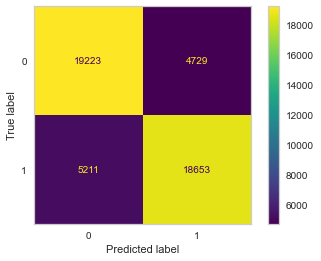

In [135]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

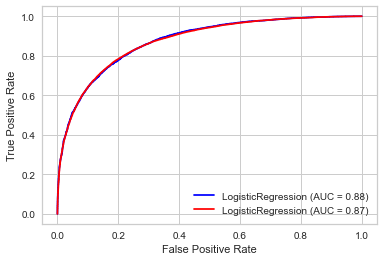

In [136]:
fig, ax = plt.subplots()
plot_roc_curve(modelo, X_train, y_train, color='blue', ax=ax)
plot_roc_curve(modelo, X_test, y_test, color='red', ax= ax)

## Cotovelo, KMeans e Regressão Logística

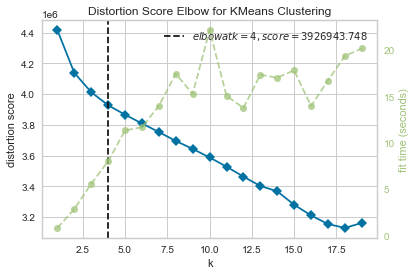

In [137]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dfs)
visualizer.show()

In [138]:
model = KMeans(n_clusters=4, n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [139]:
dfs['labels'] = model.labels_

### Labels == 0

In [140]:
mask = dfs['labels'] == 0
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
modelo.score(X,y)

0.7677771642432051

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7680412371134021

### Labels == 1

In [143]:
mask = dfs['labels'] == 1
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
modelo.score(X,y)

0.8588721410696619

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8593713620488941

In [146]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.8751390777599208
Taxa de captura: 0.9721897960585044


### Labels == 2

In [147]:
mask = dfs['labels'] == 2
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
modelo.score(X,y)

0.8462875769648678

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8496088090408577

In [150]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7143549951503395
Taxa de captura: 0.49001996007984033


### Labels == 3

In [151]:
mask = dfs['labels'] == 3
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
modelo.score(X,y)

0.7296411003825833

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7376093294460642

In [154]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7517206477732794
Taxa de captura: 0.7879270103967749


# Final !!!!

## DataFrame

In [2]:
rain = pd.read_csv('data/rain_data_aus.csv')
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')
wind_1.columns = wind_3.columns
wind_2.columns = wind_3.columns
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

In [3]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates()

## Geolocalização

In [4]:
df['location'] = df['location'].replace('NorfolkIsland', 'Norfolk Island').replace('MountGambier', 'Mount Gambier')
df['location'] = df['location'].replace('SydneyAirport', 'Sydney Airport').replace('MountGinini', 'Mount Ginini')
df['location'] = df['location'].replace('PerthAirport', 'Perth Airport').replace('AliceSprings', 'Alice Springs')
df['location'] = df['location'].replace('NorahHead', 'Norah Head').replace('WaggaWagga', 'Wagga Wagga')
df['location'] = df['location'].replace('BadgerysCreek', 'Badgerys Creek').replace('PearceRAAF', 'Pearce RAAF')
df['location'] = df['location'].replace('GoldCoast', 'Gold Coast').replace('SalmonGums', 'Salmon Gums')
df['location'] = df['location'].replace('MelbourneAirport', 'Melbourne Airport').replace('CoffsHarbour', 'Coffs Harbour')

In [5]:
local = df[['location']].drop_duplicates().reset_index().drop(columns=['index'])

In [6]:
local['latitude'] = float(0)
local['longitude'] = float(0)

In [7]:
geolocator = Nominatim(timeout=10)
for item in tqdm(range(0,49)):
    location = geolocator.geocode(local['location'][item])
    local['latitude'][item]= location.latitude
    local['longitude'][item]=location.longitude

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.
  0%|          | 0/49 [00:00<?, ?it/s]C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\yukar\Anaconda3\lib

In [8]:
df['latitude'] = float(0)
df['longitude'] = float(0)

In [9]:
df = df.merge(local, on=['location'], how='left')
df.to_csv('Geolocalização.csv')

In [10]:
df = df.drop(columns=['date','location','latitude_x','longitude_x']).rename(columns={'latitude_y':'latitude', 'longitude_y':'longitude'})

## Dummies

In [11]:
df = pd.get_dummies(df)

## Balancear DataFrame

In [12]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'latitude',
       'longitude', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE',
       'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE', 'winddir3pm_NNE',
       'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S', 'winddir3pm_SE',
       'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW', 'winddir3pm_W',
       'winddir3pm_WNW', 'winddir3pm_WSW']]
y = df['raintomorrow']

In [13]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
df = X_resampled
df['raintomorrow'] = y_resampled

## KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=2)

In [ ]:
df = pd.DataFrame(imputer.fit_transform(X_resampled), columns=X_resampled.columns)

In [ ]:
df['raintomorrow'] = y_resampled

In [ ]:
X = df.drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df['raintomorrow']

In [ ]:
df.to_csv('geo_knn.csv')

## Standardizar